In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train.corr()['SalePrice'].abs() > 0.2

/var/folders/jh/_q3zsphn00z4nwx2cszyw4mc0000gn/T/ipykernel_24810/2069690788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['SalePrice'].abs() > 0.2


Id               False
MSSubClass       False
LotFrontage       True
LotArea           True
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2       False
BsmtUnfSF         True
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF          True
LowQualFinSF     False
GrLivArea         True
BsmtFullBath      True
BsmtHalfBath     False
FullBath          True
HalfBath          True
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces        True
GarageYrBlt       True
GarageCars        True
GarageArea        True
WoodDeckSF        True
OpenPorchSF       True
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice         True
Name: SalePrice, dtype: bool

In [5]:
# Filter numeric columns
numeric_columns = train.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Select columns with correlation greater than 0.1
selected_columns = corr_matrix[abs(corr_matrix['SalePrice']) > 0.1].index

# Assign selected columns to X
X_sel = train[selected_columns]
X_sel

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,8,0,2003.0,2,548,0,61,0,0,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,6,1,2001.0,2,608,0,42,0,0,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,7,1,1998.0,3,642,0,35,272,0,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,7,1,1999.0,2,460,0,40,0,0,175000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,7,2,1978.0,2,500,349,0,0,0,210000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,9,2,1941.0,1,252,0,60,0,0,266500
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,5,0,1950.0,1,240,366,0,112,0,142125


In [6]:
len(selected_columns)

27

In [7]:
X = X_sel.drop('SalePrice', axis=1)
y = X_sel['SalePrice']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [11]:
# hyperparameter
units = 194
dropout_rate = 0.47
learning_rate = 0.0008

# Define the TensorFlow decision tree model
model = Sequential()
model.add(Dense(units, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dropout(dropout_rate))
model.add(Dense(units, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(Dense(units, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(Dense(units, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(Dense(units, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(Dense(1))  # Output layer


In [12]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate))

In [13]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20


2023-07-11 13:02:15.645450: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


39/39 [==============================] - 1s 12ms/step - loss: 38752083968.0000 - val_loss: 40645009408.0000
Epoch 2/20
39/39 [==============================] - 0s 8ms/step - loss: 38064062464.0000 - val_loss: 38298738688.0000
Epoch 3/20
39/39 [==============================] - 0s 8ms/step - loss: 43307069440.0000 - val_loss: 44027543552.0000
Epoch 4/20
39/39 [==============================] - 0s 8ms/step - loss: 43105636352.0000 - val_loss: 37375086592.0000
Epoch 5/20
39/39 [==============================] - 0s 8ms/step - loss: 46532988928.0000 - val_loss: 48050331648.0000
Epoch 6/20
39/39 [==============================] - 0s 8ms/step - loss: 114219655168.0000 - val_loss: 105992273920.0000
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 222130765824.0000 - val_loss: 187755610112.0000
Epoch 8/20
39/39 [==============================] - 0s 8ms/step - loss: 202867310592.0000 - val_loss: 128658219008.0000
Epoch 9/20
39/39 [==============================] - 0s 8ms/s

In [14]:
# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Mean Squared Error:', mse)

Mean Squared Error: 3386524827648.0


<Axes: >

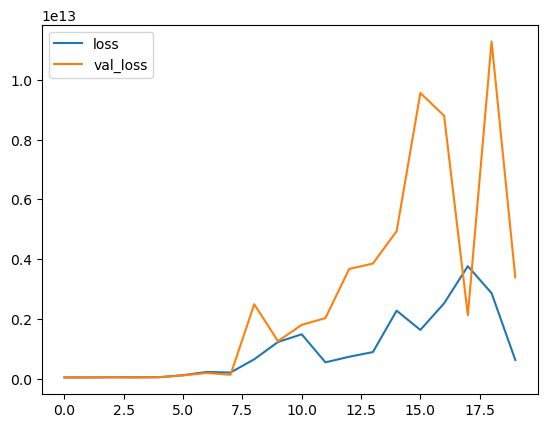

In [15]:
pd.DataFrame(history.history).plot()

In [16]:
mse = mean_squared_error(model.predict(X_test_scaled), y_test)

7/7 [==============================] - 0s 3ms/step


In [17]:
np.sqrt(mse)

1840251.2434139298